# Project Scope:
Contains data for six different countries, covering years from 2000 to 2015. There no do appear to be significant data anamolies based on initial inspection of the file. GDP data is in scientific format.

1) Will be comparing changes between the countries, in their GDP and life expectancy, over the span of years in the dataset.
2) Will be looking to see changes in life expectancy correlate to changes to GDP, and how so. Do they move up/down together? Or does one go up while the other down?
3) Will gather information on the max, min, mean, other summarical data for each country regarding their GDP and life expectancy.
4) No information is given to what portion of a country's GDP is used for medical expenditures (i.e., treatment, research, subsidies, etc.).
5) Very focued and limited data, does not account for many other variables that may effect life expectancy positively or negatively.
***

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
np.set_printoptions(suppress=True, precision = 1)

In [2]:
#import csv file
all_data = pd.read_csv("all_data.csv")

In [3]:
#convert GDP data to a more usable format
all_data["GDP_in_billions"] = all_data["GDP"] / 1000000000

In [4]:
#print(all_data.head(), end="\n\n")
print(all_data.describe(), end="\n\n")

countries = all_data['Country'].unique()

years_label = all_data['Year'].unique()

for country in countries:
    country_data = all_data[all_data.Country == country]
    print(country)
    print(country_data.describe())
    #life_gdp_cov = np.cov(country_data["Life expectancy at birth (years)"], country_data["GDP_in_billions"])
    life_gdp_cor, p = pearsonr(country_data["Life expectancy at birth (years)"], country_data["GDP_in_billions"])
    print(country + " has a correlation between life expectancy and GDP of", life_gdp_cor * 100, end="\n\n")

              Year  Life expectancy at birth (years)           GDP  \
count    96.000000                         96.000000  9.600000e+01   
mean   2007.500000                         72.789583  3.880499e+12   
std       4.633971                         10.672882  5.197561e+12   
min    2000.000000                         44.300000  4.415703e+09   
25%    2003.750000                         74.475000  1.733018e+11   
50%    2007.500000                         76.750000  1.280220e+12   
75%    2011.250000                         78.900000  4.067510e+12   
max    2015.000000                         81.000000  1.810000e+13   

       GDP_in_billions  
count        96.000000  
mean       3880.498571  
std        5197.561311  
min           4.415703  
25%         173.301750  
50%        1280.220000  
75%        4067.510000  
max       18100.000000  

Chile
              Year  Life expectancy at birth (years)           GDP  \
count    16.000000                         16.000000  1.600000e+01 

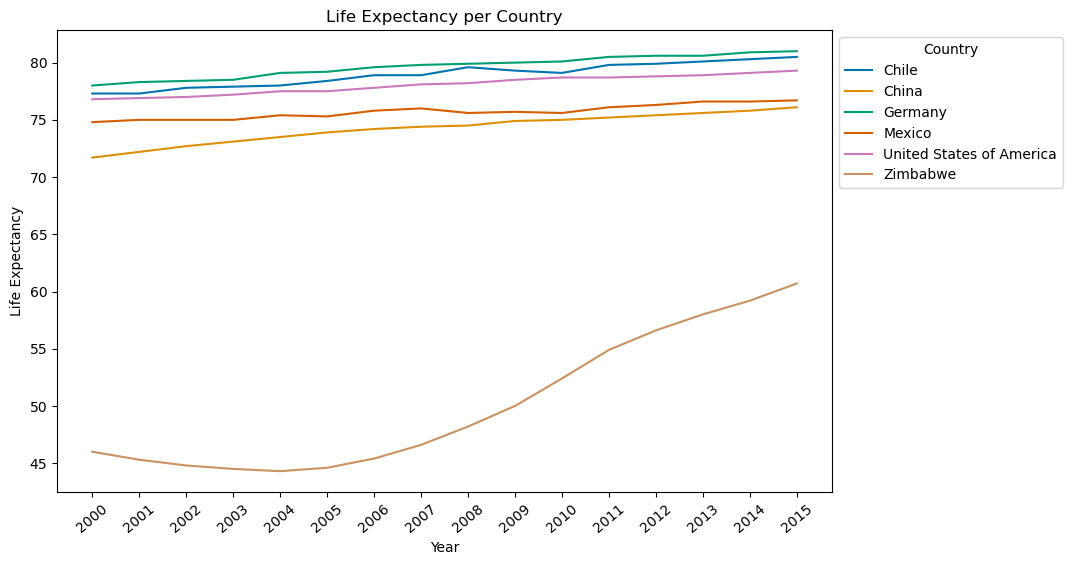

<Figure size 640x480 with 0 Axes>

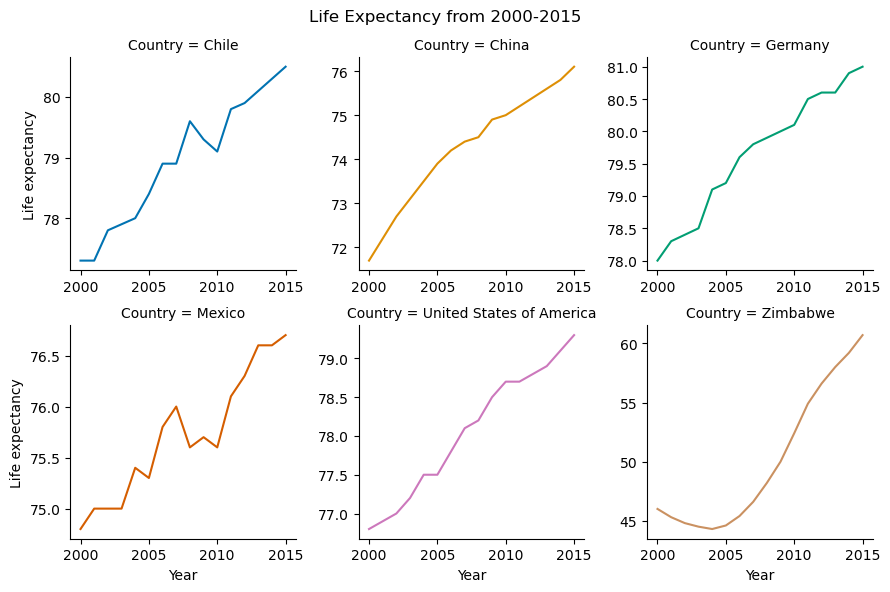

<Figure size 640x480 with 0 Axes>

In [21]:
#Lineplot comparing life expectancy for every country in dataset
plt.figure(figsize=(10, 6))
ax = sns.lineplot(
    data=all_data
    , x="Year"
    , y="Life expectancy at birth (years)"
    , hue="Country"
    , palette="colorblind"
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Life Expectancy per Country")
plt.ylabel("Life Expectancy")
plt.xticks(rotation=40)
ax.set_xticks(years_label)
ax.set_xticklabels(years_label)

plt.savefig('life-expectancy-all.png', bbox_inches='tight')
plt.show()
plt.clf()

#Separate lineplots for Life expectancy from 2000-2015 for each country in dataset
g = sns.FacetGrid(all_data, col="Country", hue="Country", col_wrap=3, sharex=False, sharey=False, palette="colorblind")
g.map(sns.lineplot, "Year", "Life expectancy at birth (years)")
g.set_axis_labels("Year", "Life expectancy")
g.fig.subplots_adjust(top=.9)
g.fig.suptitle("Life Expectancy from 2000-2015")

plt.savefig('life-expectancy-individual.png')
plt.show()
plt.clf()

***
## Commentary 1:
Compared to Zimbabwe, the other five countries have significantly higher life expectancies. However, Zimbabwe made the greatest increase, about 15 years, in life expectancy in 2000-2015 observed period, cutting the difference in gap to about half to the next lowest country.
***

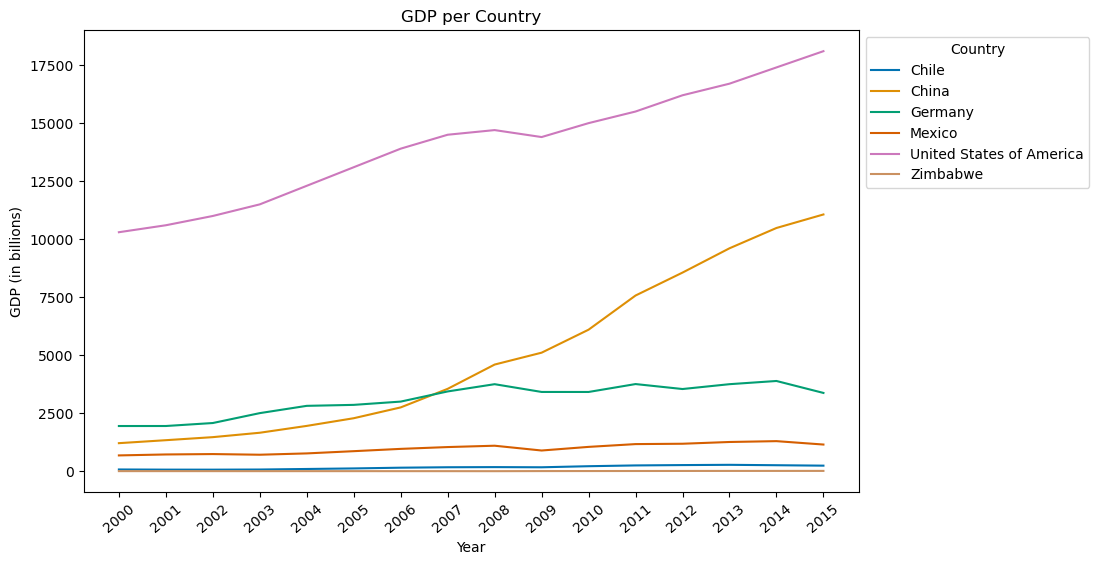

<Figure size 640x480 with 0 Axes>

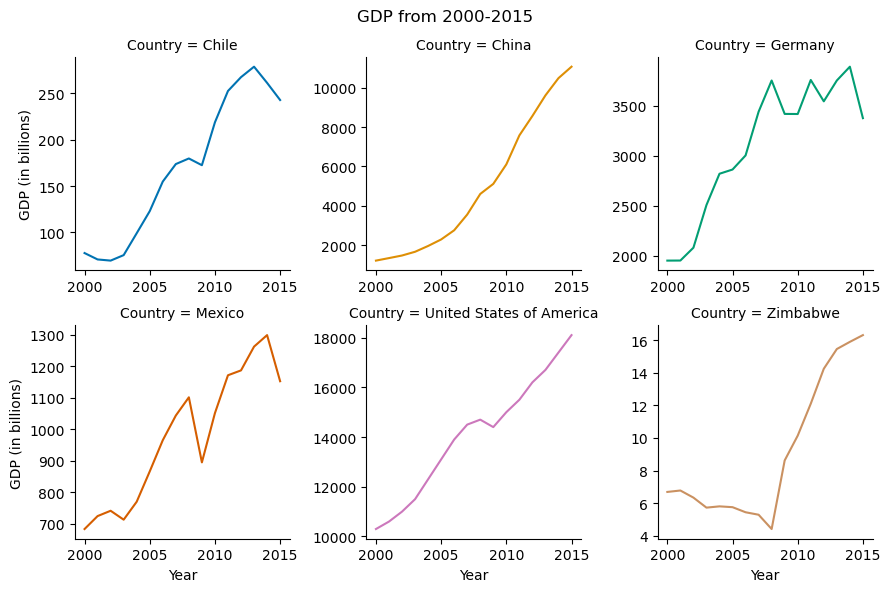

<Figure size 640x480 with 0 Axes>

In [20]:
#Lineplot comparing GDP for every country in dataset
plt.figure(figsize=(10, 6))
ax = sns.lineplot(
    data=all_data
    , x="Year"
    , y="GDP_in_billions"
    , hue="Country"
    , palette="colorblind"
    # , legend=False
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("GDP per Country")
plt.ylabel("GDP (in billions)")
plt.xticks(rotation=40)
ax.set_xticks(years_label)
ax.set_xticklabels(years_label)

plt.savefig('GDP-all.png', bbox_inches='tight')
plt.show()
plt.clf()

#Separate lineplots for GDP (in billions) from 2000-2015 for each country in dataset
g = sns.FacetGrid(all_data, col="Country", hue="Country", col_wrap=3, sharex=False, sharey=False, palette="colorblind")
g.map(sns.lineplot, "Year", "GDP_in_billions")
g.set_axis_labels("Year", "GDP (in billions)")
g.fig.subplots_adjust(top=.9)
g.fig.suptitle("GDP from 2000-2015")

plt.savefig('GDP-individual.png')
plt.show()
plt.clf()

***
## Commentary 2:
The GDP for the USA is significantly higher than the five countries throughout 2000-2015 time period. During this time, though, the GDP for China increased dramatically compared to the other four countries with lower GDPs. By 2015, the GDP for China was close to same as the GDP was for the USA in 2000.
***

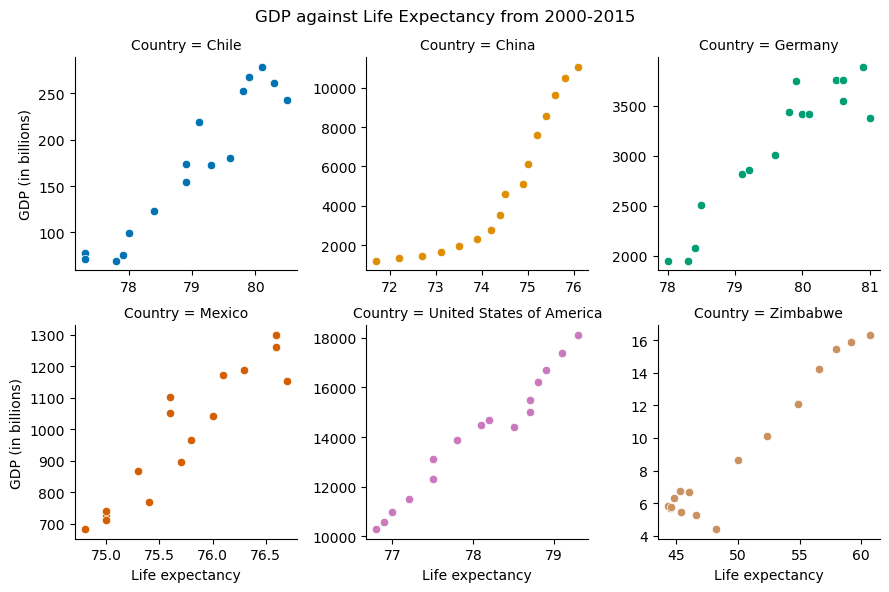

<Figure size 640x480 with 0 Axes>

In [7]:
#Separate scatterplots for GDP against Life expectancy for each country
g = sns.FacetGrid(all_data, col="Country", hue="Country", col_wrap=3, sharex=False, sharey=False, palette="colorblind")
g.map(sns.scatterplot, "Life expectancy at birth (years)", "GDP_in_billions")
g.set_axis_labels("Life expectancy", "GDP (in billions)")
g.fig.subplots_adjust(top=.9)
g.fig.suptitle("GDP against Life Expectancy from 2000-2015")

plt.savefig('GDP-v-life-expectancy-individual-scatter.png')
plt.show()
plt.clf()

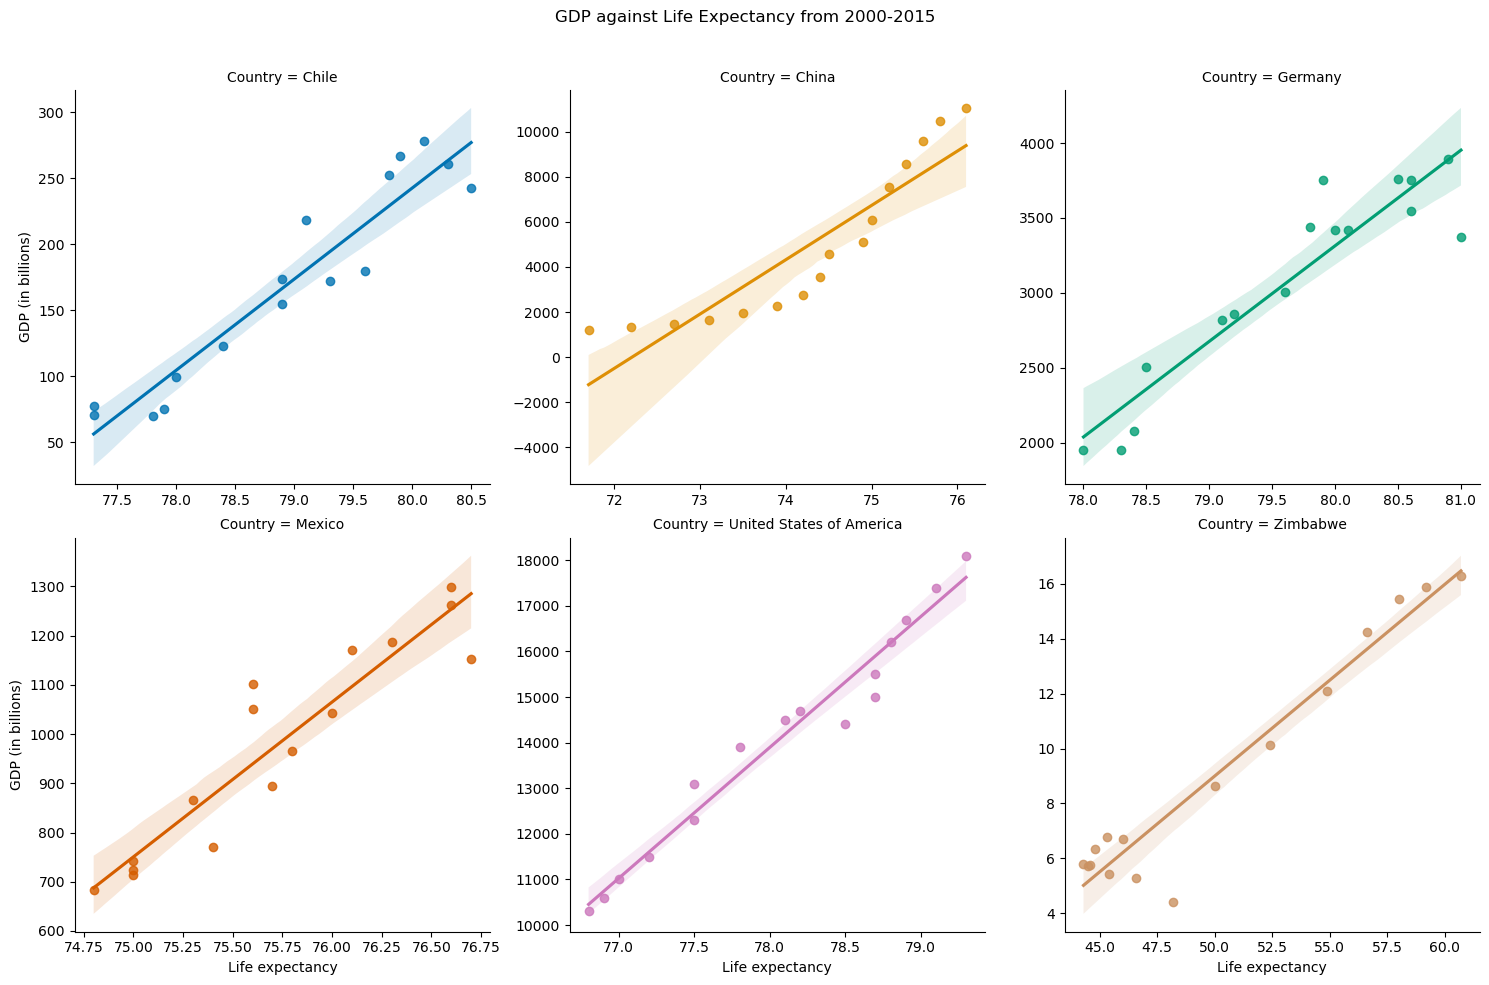

<Figure size 640x480 with 0 Axes>

In [8]:
#Separate scatterplots with linear regression for GDP against Life expectancy for each country
h = sns.lmplot(
    data=all_data
    , x="Life expectancy at birth (years)"
    , y="GDP_in_billions"
    , col="Country"
    , hue="Country"
    , palette="colorblind"
    , col_wrap=3
    , facet_kws=dict(sharex=False, sharey=False)
)
h.set_axis_labels("Life expectancy", "GDP (in billions)")
h.fig.subplots_adjust(top=.9)
h.fig.suptitle("GDP against Life Expectancy from 2000-2015")

plt.savefig('GDP-v-life-expectancy-individual-linear.png')
plt.show()
plt.clf()

***
## Commentary 3:
Though there is a fairly close correlation for six countries, the correlation for China is distinctly less than the others.
***

Averages for 
                           Life expectancy at birth (years)  GDP_in_billions
Country                                                                    
Chile                                             78.94375       169.788845
China                                             74.26250      4957.713750
Germany                                           79.65625      3094.775625
Mexico                                            75.71875       976.650625
United States of America                          78.06250     14075.000000
Zimbabwe                                          50.09375         9.062580

Standard Deviations for 
                           Life expectancy at birth (years)  GDP_in_billions
Country                                                                    
Chile                                             1.121292     5.910356e+03
China                                             1.737167     1.225767e+07
Germany                                       

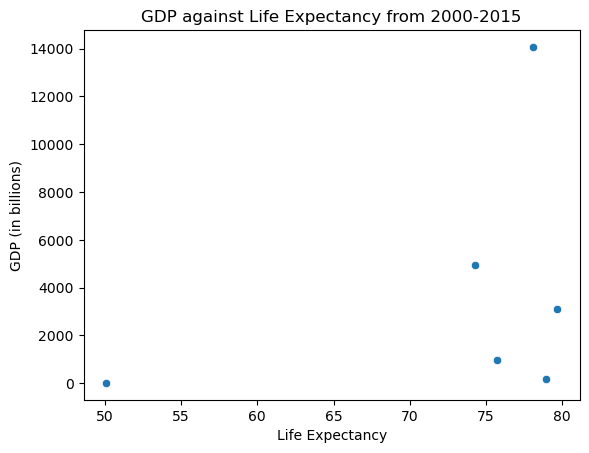

<Figure size 640x480 with 0 Axes>

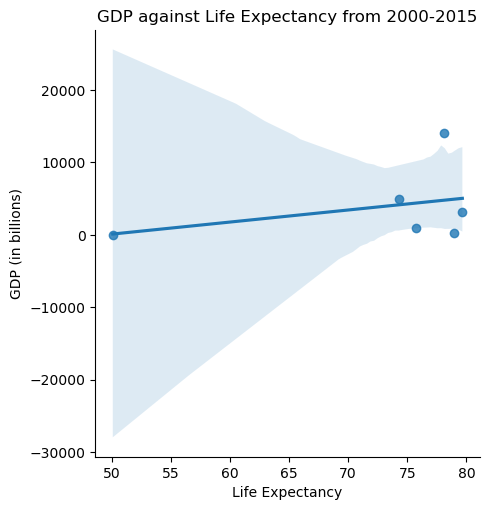

<Figure size 640x480 with 0 Axes>

In [23]:
#dataframe with data excluding Year
agg_data = all_data.reindex(columns=["Country", "Life expectancy at birth (years)", "GDP_in_billions"])

print("Averages for \n",
    agg_data.groupby("Country").mean(), end="\n\n"
    )

print("Standard Deviations for \n",
    agg_data.groupby("Country").var(), end="\n\n"
    )

print("Variances for \n",
    agg_data.groupby("Country").var(), end="\n\n"
    )

#dataframe with the average data for life expectancy and GDP grouped by Country
grouped = agg_data.groupby("Country").mean()

#life_gdp_cov = np.cov(grouped["Life expectancy at birth (years)"], grouped["GDP_in_billions"])

life_gdp_cor, p = pearsonr(grouped["Life expectancy at birth (years)"], grouped["GDP_in_billions"])
print("Correlation of life expectancy and GDP for all countries combined:")
print(life_gdp_cor, end="\n\n")

#Scatterplot for average GDP against Life expetancy
sns.scatterplot(data=grouped, x="Life expectancy at birth (years)", y="GDP_in_billions")
plt.title("GDP against Life Expectancy from 2000-2015")
plt.xlabel("Life Expectancy")
plt.ylabel("GDP (in billions)")

plt.savefig('GDP-v-life-expectancy-all-scatter.png', bbox_inches='tight')
plt.show()
plt.clf()

#Scatterplot with linear regression
sns.lmplot(data=grouped, x="Life expectancy at birth (years)", y="GDP_in_billions")
plt.title("GDP against Life Expectancy from 2000-2015")
plt.xlabel("Life Expectancy")
plt.ylabel("GDP (in billions)")

plt.savefig('GDP-v-life-expectancy-all-linear.png', bbox_inches='tight')
plt.show()
plt.clf()

***
# Final Commentary
Each country recorded an overall increase in GDP and life expectancy from 2000 to 2015, though Chile, Germany, and Mexico showed decreases in GDP in at the end of the time period for the dataset.

For each individual country, there seems to be a correlation with their GDP and life expectancy. However, there does not seem to be a correlation with the amount of GDP and the length of life expectancy, as countries with similar levels of life expectancy had vastly different levels of GDP. For example, Chile and Germany had higher life expectancy than the USA, though they had much lower GDPs. Also, China though averaging the second highest GDP, had the second lowest life expectancy.

With the limited dataset, there is no evidence how, or if, GDP effects life expectancy, or vice versa, for the individual countries.